# Penguins_data adsgan syn

In [1]:
# Imports

from synthesizers import Load
from syntheval import SynthEval

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[KeOps] Warning : 
    The default C++ compiler could not be found on your system.
    You need to either define the CXX environment variable or a symlink to the g++ command.
    For example if g++-8 is the command you can do
      import os
      os.environ['CXX'] = 'g++-8'
    
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


In [4]:
# Real penguins_data for reference
penguins_real = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Data\penguin_data\penguins_size.csv")

# Drop NaN values
penguins_real = penguins_real.dropna()

# Baseline train/test split
penguins_train = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_train.csv")
penguins_test = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_test.csv")

target = 'species'

penguins_length = penguins_real.shape[0]

# Testing multiple models on penguin_data

In [3]:
gen_methods = ["tvae", "bayesian_network", "privbayes", "adsgan", "ctgan"]
result_name = "penguin_methods"

In [6]:
state = Load(penguins_real).Synthesize(split_size=0.8, train_plugin=gen_methods, gen_count=penguins_length, n_jobs=len(gen_methods), eval_target_col=target)

[2024-05-03T12:45:01.766573+0200][10856][CRITICAL] module disabled: c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
100%|██████████| 1000/1000 [02:50<00:00,  5.86it/s]
[2024-05-03T12:47:55.631239+0200][10856][CRITICAL] module disabled: c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
[2024-05-03T12:48:02.592554+0200][10856][CRITICAL] module disabled: c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
100%|██████████| 6/6 [00:00<00:00, 10.70it/s]
[2024-05-03T12:48:03.309443+0200][10856][CRITICAL] module disabled: c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 12%|█▏        | 1199/10000 [02:10<15:58,  9.19it/s]
[2024-05-03T12:50:14.125089+0200][10856][CRITICAL] module disabled: c:\Users\lucas\AppData\Local\Programs\Python\

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!
Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!
Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!
Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!
Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


In [7]:
state[0].eval

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.036916,0.009019,0.963084,0.009019
1,pca_eigval_diff,u,0.146653,NaN,0.853347,NaN
2,pca_eigvec_ang,u,0.054362,NaN,0.982696,NaN
3,avg_cio,u,0.013339,0.007917,0.013339,0.007917
4,corr_mat_diff,u,1.674744,NaN,0.920250,NaN
5,mutual_inf_diff,u,1.232457,NaN,0.941312,NaN
6,ks_tvd_stat,u,0.107665,0.014520,0.892335,0.014520
7,frac_ks_sigs,u,0.714286,NaN,0.285714,NaN
8,avg_h_dist,u,0.026760,0.014737,0.973240,0.014737
9,avg_pMSE,u,0.020379,0.001763,0.918484,0.007052


In [8]:
results = pd.DataFrame(columns=["f1_diff", "f1_diff_holdout"])

for i in range(len(gen_methods)):
    eval = state[i].eval.set_index("metric")
    results.loc[gen_methods[i]] = [eval.loc["cls_F1_diff", "val"], eval.loc["cls_F1_diff_hout", "val"]]
results

,f1_diff,f1_diff_holdout
tvae,0.195528,0.141791
bayesian_network,0.062666,0.052239
privbayes,0.489535,0.552239
adsgan,0.127393,0.059701
ctgan,0.055276,0.044776


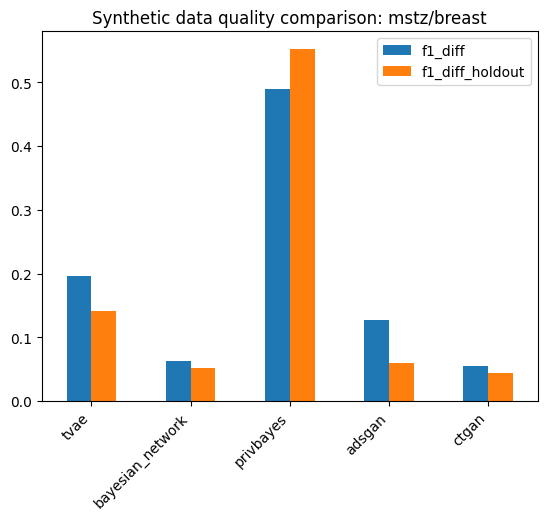

In [9]:
results.plot.bar()
plt.title("Synthetic data quality comparison: mstz/breast")
plt.xticks(rotation=45, ha="right")
plt.show()

# Actual adsgan training on penguins_data

In [13]:
# Real penguins_data for reference
penguins_real = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Data\penguin_data\penguins_size.csv")

# Drop NaN values
penguins_real = penguins_real.dropna()

# Baseline train/test split
penguins_train = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_train.csv")
penguins_test = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins_test.csv")

target = 'species'

gen_count = penguins_real.shape[0]

Train and generation of adsgan_syn_v1

In [14]:
# Synthesize data with adsgan
Load(penguins_train).Train(train_adapter="synthcity", plugin="adsgan").Generate(count=gen_count).Save(name="penguin_adsgan_syn_v1.csv", key="synth")

[2024-05-03T13:06:34.483872+0200][10856][CRITICAL] module disabled: c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
  8%|▊         | 799/10000 [01:30<17:18,  8.86it/s]


[{'train':        species     island  culmen_length_mm  culmen_depth_mm  \
0       Gentoo     Biscoe              40.9             13.7   
1       Adelie      Dream              37.3             17.8   
2       Gentoo     Biscoe              50.0             15.9   
3       Adelie     Biscoe              35.9             19.2   
4       Adelie     Biscoe              40.5             18.9   
..         ...        ...               ...              ...   
262  Chinstrap      Dream              50.9             19.1   
263     Adelie  Torgersen              37.2             19.4   
264     Adelie     Biscoe              39.7             17.7   
265     Gentoo     Biscoe              45.5             15.0   
266     Adelie     Biscoe              38.1             17.0   

     flipper_length_mm  body_mass_g     sex  
0                214.0       4650.0  FEMALE  
1                191.0       3350.0  FEMALE  
2                224.0       5350.0    MALE  
3                189.0       3800.0 

Eval of adsgan_syn_v1

In [18]:
# Read synthetic data
penguin_adsgan_syn_v1 = pd.read_csv("penguin_adsgan_syn_v1.csv").round(1)

# Remove first col
penguin_adsgan_syn_v1 = penguin_adsgan_syn_v1.iloc[:, 1:]

# Evaluate
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_base = S.evaluate(penguin_adsgan_syn_v1, target, "full_eval")
res_base

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.011547,0.009150,0.988453,0.009150
1,pca_eigval_diff,u,0.037941,NaN,0.962059,NaN
2,pca_eigvec_ang,u,0.010305,NaN,0.996720,NaN
3,avg_cio,u,0.672375,0.226349,0.672375,0.226349
4,corr_mat_diff,u,0.559023,NaN,0.973380,NaN
5,mutual_inf_diff,u,0.710584,NaN,0.966163,NaN
6,ks_tvd_stat,u,0.076664,0.014209,0.923336,0.014209
7,frac_ks_sigs,u,0.285714,NaN,0.714286,NaN
8,avg_h_dist,u,0.108715,0.094725,0.891285,0.094725
9,avg_pMSE,u,0.008667,0.000768,0.965331,0.003073


adsgan_stack_v1

In [21]:
# Concatenate real and synthetic data
adsgan_stack = pd.concat([penguins_real, penguin_adsgan_syn_v1])

# Save to csv
adsgan_stack.to_csv("penguin_adsgan_stack_v1.csv", index=False)

# Read stack
penguin_adsgan_stack_v1 = pd.read_csv("penguin_adsgan_stack_v1.csv")

# Split the stack
p_train, p_test = train_test_split(penguin_adsgan_stack_v1, train_size=0.8, random_state=42)

# Save to csv
p_train.to_csv("penguin_adsgan_stack_v1_train.csv", index=False)
p_test.to_csv("penguin_adsgan_stack_v1_test.csv", index=False)

# Read train and test
penguin_adsgan_stack_v1_train = pd.read_csv("penguin_adsgan_stack_v1_train.csv")
penguin_adsgan_stack_v1_test = pd.read_csv("penguin_adsgan_stack_v1_test.csv")

gen_count = penguin_adsgan_stack_v1.shape[0]

Train and generation of adsgan_syn_v2

In [22]:
# Synthesize
Load(penguin_adsgan_stack_v1_train).Train(train_adapter="synthcity", plugin="adsgan").Generate(count=gen_count).Save(name="penguin_adsgan_syn_v2.csv", key="synth")

[2024-05-03T13:28:42.870358+0200][10856][CRITICAL] module disabled: c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
  8%|▊         | 799/10000 [02:35<29:53,  5.13it/s]  


[{'train':     species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Gentoo     Biscoe              45.1             14.5              215.0   
1    Adelie     Biscoe              39.4             16.8              180.6   
2    Gentoo     Biscoe              49.2             15.0              223.8   
3    Adelie     Biscoe              41.1             19.1              188.0   
4    Adelie      Dream              41.5             18.5              201.0   
..      ...        ...               ...              ...                ...   
529  Adelie  Torgersen              37.2             19.4              184.0   
530  Adelie     Biscoe              39.7             17.7              193.0   
531  Gentoo     Biscoe              45.5             15.0              220.0   
532  Gentoo     Biscoe              50.1             14.9              221.5   
533  Adelie     Biscoe              38.1             17.0              181.0   

     body_mass_g     sex  
0

Eval of adsgan_syn_v2

In [23]:
# Read synthetic data
penguin_adsgan_syn_v2 = pd.read_csv("penguin_adsgan_syn_v2.csv").round(1)

# Remove first col
penguin_adsgan_syn_v2 = penguin_adsgan_syn_v2.iloc[:, 1:]

# Evaluate
S = SynthEval(penguin_adsgan_stack_v1_train, holdout_dataframe=penguin_adsgan_stack_v1_test, verbose=0)
res_stack_v1 = S.evaluate(penguin_adsgan_syn_v2, target, "full_eval")
res_stack_v1

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.038775,0.006573,0.961225,0.006573
1,pca_eigval_diff,u,0.046890,NaN,0.953110,NaN
2,pca_eigvec_ang,u,0.035853,NaN,0.988587,NaN
3,avg_cio,u,0.137247,0.137247,0.137247,0.137247
4,corr_mat_diff,u,0.402427,NaN,0.980837,NaN
5,mutual_inf_diff,u,0.209858,NaN,0.990007,NaN
6,ks_tvd_stat,u,0.082661,0.020701,0.917339,0.020701
7,frac_ks_sigs,u,0.428571,NaN,0.571429,NaN
8,avg_h_dist,u,0.015525,0.007696,0.984475,0.007696
9,avg_pMSE,u,0.014941,0.001302,0.940235,0.005209


adsgan_stack_v2

In [24]:
# Concatenate stack and synthetic data
adsgan_stack_v2 = pd.concat([penguin_adsgan_stack_v1, penguin_adsgan_syn_v2])

# Save to csv
adsgan_stack_v2.to_csv("penguin_adsgan_stack_v2.csv", index=False)

# Read stack
penguin_adsgan_stack_v2 = pd.read_csv("penguin_adsgan_stack_v2.csv")

# Split the stack
p_train, p_test = train_test_split(penguin_adsgan_stack_v2, train_size=0.8, random_state=42)

# Save to csv
p_train.to_csv("penguin_adsgan_stack_v2_train.csv", index=False)
p_test.to_csv("penguin_adsgan_stack_v2_test.csv", index=False)

# Read train and test
penguin_adsgan_stack_v2_train = pd.read_csv("penguin_adsgan_stack_v2_train.csv")
penguin_adsgan_stack_v2_test = pd.read_csv("penguin_adsgan_stack_v2_test.csv")

gen_count = penguin_adsgan_stack_v2.shape[0]

Train and generation of adsgan_syn_v3

In [25]:
# Synthesize
Load(penguin_adsgan_stack_v2_train).Train(train_adapter="synthcity", plugin="adsgan").Generate(count=gen_count).Save(name="penguin_adsgan_syn_v3.csv", key="synth")

[2024-05-03T13:34:55.181891+0200][10856][CRITICAL] module disabled: c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
  7%|▋         | 699/10000 [04:17<57:12,  2.71it/s]  


[{'train':         species     island  culmen_length_mm  culmen_depth_mm  \
0     Chinstrap      Dream              53.2             20.0   
1        Adelie      Dream              39.7             17.6   
2        Gentoo     Biscoe              44.1             14.1   
3     Chinstrap      Dream              46.7             17.9   
4        Gentoo     Biscoe              45.7             13.9   
...         ...        ...               ...              ...   
1063  Chinstrap      Dream              53.2             18.4   
1064     Gentoo  Torgersen              37.8             18.5   
1065     Gentoo     Biscoe              36.4             13.9   
1066     Gentoo     Biscoe              46.1             13.1   
1067     Adelie     Biscoe              36.7             16.5   

      flipper_length_mm  body_mass_g     sex  
0                 203.0       5012.2    MALE  
1                 191.2       3769.9    MALE  
2                 230.5       4717.8  FEMALE  
3                 19

Eval of adsgan_syn_v3

In [26]:
# Read synthetic data
penguin_adsgan_syn_v3 = pd.read_csv("penguin_adsgan_syn_v3.csv").round(1)

# Remove first col
penguin_adsgan_syn_v3 = penguin_adsgan_syn_v3.iloc[:, 1:]

# Evaluate
S = SynthEval(penguin_adsgan_stack_v2_train, holdout_dataframe=penguin_adsgan_stack_v2_test, verbose=0)
res_stack_v2 = S.evaluate(penguin_adsgan_syn_v3, target, "full_eval")
res_stack_v2

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.092675,0.004784,0.907325,0.004784
1,pca_eigval_diff,u,0.030284,NaN,0.969716,NaN
2,pca_eigvec_ang,u,0.029122,NaN,0.990730,NaN
3,avg_cio,u,0.000000,0.000000,0.000000,0.000000
4,corr_mat_diff,u,0.324375,NaN,0.984554,NaN
5,mutual_inf_diff,u,0.253688,NaN,0.987920,NaN
6,ks_tvd_stat,u,0.150138,0.040709,0.849862,0.040709
7,frac_ks_sigs,u,1.000000,NaN,0.000000,NaN
8,avg_h_dist,u,0.018304,0.009041,0.981696,0.009041
9,avg_pMSE,u,0.076428,0.001803,0.694290,0.007214


adsgan_stack_v3

In [27]:
# Concatenate stack and synthetic data
adsgan_stack_v3 = pd.concat([penguin_adsgan_stack_v2, penguin_adsgan_syn_v3])

# Save to csv
adsgan_stack_v3.to_csv("penguin_adsgan_stack_v3.csv", index=False)

# Read stack
penguin_adsgan_stack_v3 = pd.read_csv("penguin_adsgan_stack_v3.csv")

# Split the stack
p_train, p_test = train_test_split(penguin_adsgan_stack_v3, train_size=0.8, random_state=42)

# Save to csv
p_train.to_csv("penguin_adsgan_stack_v3_train.csv", index=False)
p_test.to_csv("penguin_adsgan_stack_v3_test.csv", index=False)

# Read train and test
penguin_adsgan_stack_v3_train = pd.read_csv("penguin_adsgan_stack_v3_train.csv")
penguin_adsgan_stack_v3_test = pd.read_csv("penguin_adsgan_stack_v3_test.csv")

gen_count = penguin_adsgan_stack_v3.shape[0]

Train and generation of adsgan_syn_v4

In [28]:
# Synthesize
Load(penguin_adsgan_stack_v3_train).Train(train_adapter="synthcity", plugin="adsgan").Generate(count=gen_count).Save(name="penguin_adsgan_syn_v4.csv", key="synth")

[2024-05-03T13:39:57.704428+0200][10856][CRITICAL] module disabled: c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
  7%|▋         | 749/10000 [08:08<1:40:27,  1.53it/s]


[{'train':         species     island  culmen_length_mm  culmen_depth_mm  \
0        Gentoo     Biscoe              53.9             14.4   
1        Gentoo      Dream              49.8             15.0   
2        Adelie  Torgersen              42.8             18.5   
3        Adelie  Torgersen              39.8             17.8   
4     Chinstrap      Dream              53.0             15.5   
...         ...        ...               ...              ...   
2132     Adelie      Dream              39.4             16.9   
2133  Chinstrap      Dream              53.2             18.4   
2134     Gentoo  Torgersen              37.8             18.5   
2135     Gentoo     Biscoe              36.4             13.9   
2136     Gentoo     Biscoe              46.1             13.1   

      flipper_length_mm  body_mass_g     sex  
0                 231.0       5860.0    MALE  
1                 219.5       4740.6  FEMALE  
2                 195.0       4250.0    MALE  
3                 19

Eval of adsgan_syn_v4

In [29]:
# Read synthetic data
penguin_adsgan_syn_v4 = pd.read_csv("penguin_adsgan_syn_v4.csv").round(1)

# Remove first col
penguin_adsgan_syn_v4 = penguin_adsgan_syn_v4.iloc[:, 1:]

# Evaluate
S = SynthEval(penguin_adsgan_stack_v3_train, holdout_dataframe=penguin_adsgan_stack_v3_test, verbose=0)
res_stack_v3 = S.evaluate(penguin_adsgan_syn_v4, target, "full_eval")
res_stack_v3

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.012570,0.003356,0.987430,0.003356
1,pca_eigval_diff,u,0.031962,NaN,0.968038,NaN
2,pca_eigvec_ang,u,0.014875,NaN,0.995265,NaN
3,avg_cio,u,0.167231,0.167231,0.167231,0.167231
4,corr_mat_diff,u,0.233904,NaN,0.988862,NaN
5,mutual_inf_diff,u,0.187008,NaN,0.991095,NaN
6,ks_tvd_stat,u,0.060389,0.015260,0.939611,0.015260
7,frac_ks_sigs,u,0.571429,NaN,0.428571,NaN
8,avg_h_dist,u,0.006942,0.003583,0.993058,0.003583
9,avg_pMSE,u,0.002629,0.000132,0.989483,0.000529


adsgan_stack_v4

In [30]:
# Concatenate stack and synthetic data
adsgan_stack_v4 = pd.concat([penguin_adsgan_stack_v3, penguin_adsgan_syn_v4])

# Save to csv
adsgan_stack_v4.to_csv("penguin_adsgan_stack_v4.csv", index=False)

# Read stack
penguin_adsgan_stack_v4 = pd.read_csv("penguin_adsgan_stack_v4.csv")

# Split the stack
p_train, p_test = train_test_split(penguin_adsgan_stack_v4, train_size=0.8, random_state=42)

# Save to csv
p_train.to_csv("penguin_adsgan_stack_v4_train.csv", index=False)
p_test.to_csv("penguin_adsgan_stack_v4_test.csv", index=False)

# Read train and test
penguin_adsgan_stack_v4_train = pd.read_csv("penguin_adsgan_stack_v4_train.csv")
penguin_adsgan_stack_v4_test = pd.read_csv("penguin_adsgan_stack_v4_test.csv")

gen_count = penguin_adsgan_stack_v4.shape[0]

Train and generation of adsgan_syn_v5

In [31]:
# Synthesize
Load(penguin_adsgan_stack_v4_train).Train(train_adapter="synthcity", plugin="adsgan").Generate(count=gen_count).Save(name="penguin_adsgan_syn_v5.csv", key="synth")

[2024-05-03T13:52:47.378143+0200][10856][CRITICAL] module disabled: c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
  6%|▋         | 649/10000 [14:41<3:31:41,  1.36s/it]


[{'train':         species     island  culmen_length_mm  culmen_depth_mm  \
0        Adelie      Dream              57.1             17.6   
1        Adelie  Torgersen              38.8             17.6   
2     Chinstrap      Dream              36.6             16.0   
3        Gentoo     Biscoe              37.4             13.6   
4        Adelie      Dream              40.6             18.1   
...         ...        ...               ...              ...   
4270  Chinstrap      Dream              55.3             17.7   
4271     Gentoo     Biscoe              42.8             14.4   
4272     Adelie     Biscoe              40.1             18.3   
4273     Gentoo     Biscoe              50.9             13.1   
4274     Gentoo     Biscoe              46.1             13.1   

      flipper_length_mm  body_mass_g     sex  
0                 204.5       3985.3    MALE  
1                 191.0       3275.0  FEMALE  
2                 197.7       3327.8  FEMALE  
3                 21

Eval of adsgan_syn_v5

In [32]:
# Read synthetic data
penguin_adsgan_syn_v5 = pd.read_csv("penguin_adsgan_syn_v5.csv").round(1)

# Remove first col
penguin_adsgan_syn_v5 = penguin_adsgan_syn_v5.iloc[:, 1:]

# Evaluate
S = SynthEval(penguin_adsgan_stack_v4_train, holdout_dataframe=penguin_adsgan_stack_v4_test, verbose=0)
res_stack_v4 = S.evaluate(penguin_adsgan_syn_v5, target, "full_eval")
res_stack_v4

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.031188,0.002382,0.968812,0.002382
1,pca_eigval_diff,u,0.007842,NaN,0.992158,NaN
2,pca_eigvec_ang,u,0.008045,NaN,0.997439,NaN
3,avg_cio,u,0.000000,0.000000,0.000000,0.000000
4,corr_mat_diff,u,0.305090,NaN,0.985472,NaN
5,mutual_inf_diff,u,0.206546,NaN,0.990164,NaN
6,ks_tvd_stat,u,0.075561,0.026855,0.924439,0.026855
7,frac_ks_sigs,u,0.714286,NaN,0.285714,NaN
8,avg_h_dist,u,0.007390,0.004238,0.992610,0.004238
9,avg_pMSE,u,0.008499,0.000164,0.966002,0.000654


adsgan_stack_v5

In [33]:
# Concatenate stack and synthetic data
adsgan_stack_v5 = pd.concat([penguin_adsgan_stack_v4, penguin_adsgan_syn_v5])

# Save to csv
adsgan_stack_v5.to_csv("penguin_adsgan_stack_v5.csv", index=False)

# Read stack
penguin_adsgan_stack_v5 = pd.read_csv("penguin_adsgan_stack_v5.csv")

# Split the stack
p_train, p_test = train_test_split(penguin_adsgan_stack_v5, train_size=0.8, random_state=42)

# Save to csv
p_train.to_csv("penguin_adsgan_stack_v5_train.csv", index=False)
p_test.to_csv("penguin_adsgan_stack_v5_test.csv", index=False)

# Read train and test
penguin_adsgan_stack_v5_train = pd.read_csv("penguin_adsgan_stack_v5_train.csv")
penguin_adsgan_stack_v5_test = pd.read_csv("penguin_adsgan_stack_v5_test.csv")

adsgan_stack_v5 will be "final" stack

Seperate penguins_real data from stack_v5 for a "synth_only" stack

In [34]:
# Remove the first 334 entries from stack_v5, equal to the number of entries in penguins_real
penguin_adsgan_stack_synth_only = penguin_adsgan_stack_v5.iloc[334:, :]

# Save to csv
penguin_adsgan_stack_synth_only.to_csv("penguin_adsgan_stack_synth_only.csv", index=False)

In [35]:
# Split the stack
p_train, p_test = train_test_split(penguin_adsgan_stack_synth_only, train_size=0.8, random_state=42)

# Save to csv
p_train.to_csv("penguin_adsgan_stack_synth_only_train.csv", index=False)
p_test.to_csv("penguin_adsgan_stack_synth_only_test.csv", index=False)

# Read train and test
penguin_adsgan_stack_synth_only_train = pd.read_csv("penguin_adsgan_stack_synth_only_train.csv")
penguin_adsgan_stack_synth_only_test = pd.read_csv("penguin_adsgan_stack_synth_only_test.csv")

# Train on final stack (adsgan_stack_v5) and save as state for multiple generations

In [ ]:
# Training on adsgan_stack_v5 and saving as state
state_penguin_adsgan_full_stack = Load(penguin_adsgan_stack_v5_train).Train(train_adapter="synthcity", plugin="adsgan").Save("penguin_adsgan_full_stack")

# Train on final synth_only stack and save as state for multiple generations

In [ ]:
# Training on adsgan_stack_synth_only and saving as state
state_penguin_adsgan_synth_only = Load(penguin_adsgan_stack_synth_only_train).Train(train_adapter="synthcity", plugin="adsgan").Save("penguin_adsgan_synth_only")